# DarkNet Training

In [ ]:
#Import the fastai library 
from fastai.vision import *

In [ ]:
#Mount the Google Drive directory '/content/drive' to Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Stablish the directory of the training and test images on the path variable
path = Path('/content/drive/MyDrive/img')

In [ ]:
#Set the random seed of the NumPy pseudo-random number generator so NumPy 
#generate pseudo-random numbers for random processes.
np.random.seed(41)
#Grabs all the images in the 'path' directory (train and test images) 
#and normalizes them to 256x256 pixels where bs is the batch size and 
#num_workersn describes how many subprocesses to use for data loading.
data = ImageDataBunch.from_folder(path, train="train", valid ="test",
        ds_tfms=get_transforms(), size=(256,256), bs=32, num_workers=4).normalize()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
#DarkCovidNet (modified Darknet model)
#Model obtained from https://discuss.pytorch.org/t/load-a-single-image-in-a-pretrained-pytorch-net-always-get-0-of-predict/92740
def conv_block(ni, nf, size=3, stride=1):
    for_pad = lambda s: s if s > 2 else 3
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
                  padding=(for_pad(size) - 1)//2, bias=False), 
        nn.BatchNorm2d(nf),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)  
    )
def triple_conv(ni, nf):
    return nn.Sequential(
        conv_block(ni, nf),
        conv_block(nf, ni, size=1),  
        conv_block(ni, nf)
    )
def maxpooling():
    return nn.MaxPool2d(2, stride=2)

model = nn.Sequential(
    conv_block(3, 8),
    maxpooling(),
    conv_block(8, 16),
    maxpooling(),
    triple_conv(16, 32),
    maxpooling(),
    triple_conv(32, 64),
    maxpooling(),
    triple_conv(64, 128),
    maxpooling(),
    triple_conv(128, 256),
    conv_block(256, 128, size=1),
    conv_block(128, 256),
    conv_layer(256, 4),
    Flatten(),
    nn.Linear(676, 4)
)

In [ ]:
#Put the CNN model into a Learner along with the data, loss function and 
#metrics to print out
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
print(learn.summary())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 256, 256]        216        True      
______________________________________________________________________
BatchNorm2d          [8, 256, 256]        16         True      
______________________________________________________________________
LeakyReLU            [8, 256, 256]        0          False     
______________________________________________________________________
MaxPool2d            [8, 128, 128]        0          False     
______________________________________________________________________
Conv2d               [16, 128, 128]       1,152      True      
______________________________________________________________________
BatchNorm2d          [16, 128, 128]       32         True      
______________________________________________________________________
LeakyReLU            [16, 128, 128]       0          False     
___________________________________________________

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [ ]:
#Net training
#Uses large, cyclical learning rates to train models significantly quicker and 
#with higher accuracy. 
learn.fit_one_cycle(10, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.679737,0.805098,0.645833,09:36
1,0.632967,0.731846,0.675000,08:55
2,0.662712,0.590524,0.700000,08:53
3,0.585085,0.920232,0.610417,08:54
4,0.563702,0.888047,0.593750,08:53
5,0.517100,0.506091,0.745833,08:57
6,0.484457,0.608298,0.737500,08:57
7,0.451266,0.482813,0.766667,08:58
8,0.412545,0.482710,0.760417,08:58


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "T

epoch,train_loss,valid_loss,accuracy,time
0,0.679737,0.805098,0.645833,09:36
1,0.632967,0.731846,0.675000,08:55
2,0.662712,0.590524,0.700000,08:53
3,0.585085,0.920232,0.610417,08:54
4,0.563702,0.888047,0.593750,08:53
5,0.517100,0.506091,0.745833,08:57
6,0.484457,0.608298,0.737500,08:57
7,0.451266,0.482813,0.766667,08:58
8,0.412545,0.482710,0.760417,08:58
9,0.392345,0.487627,0.758333,08:54


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

# Model Saving

In [ ]:
#Save the trained model and copy to drive
learn.save(path/'DarkNet_Paper')

# Model Loading

In [ ]:
#Loads the previosly saved model
learn=learn.load('/content/drive/MyDrive/img/DarkNet_Paper')

# Metrics

In [ ]:
#Shows the number of images used in training and validation
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 4319
Number of examples in validation: 480


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

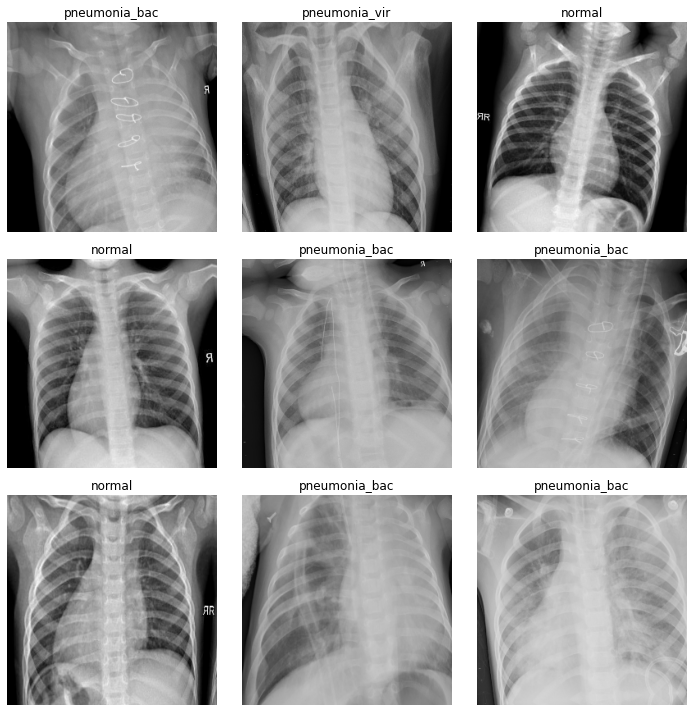

In [ ]:
#Allows to see what a sample of a batch looks like.
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
#Imports matplotlib.pyplot library as plt
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss over 10 Epochs')

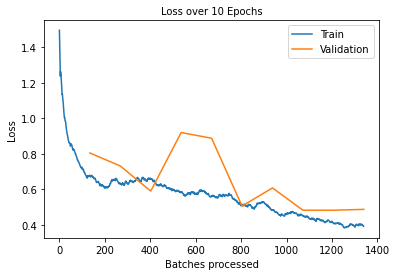

In [ ]:
#Plots the loss over the 10 epochs of training
learn.recorder.plot_losses()
plt.title('Loss over 10 Epochs', size=10)

Text(0.5, 1.0, 'Accuracy over 10 Epochs')

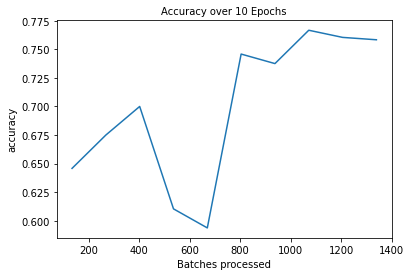

In [ ]:
#Plots the accuracy over the 10 epochs of training
learn.recorder.plot_metrics()
plt.title('Accuracy over 10 Epochs', size=10)

In [ ]:
#Probs has the obtained labels and targets the actual labels in the data set
probs,targets = learn.get_preds(ds_type=DatasetType.Valid)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
#Measures the accuracy of the trained net with the probs and targets values 
#obtained previously
accuracy(probs,targets)

tensor(0.7583)

In [ ]:
#Shows the data classes, number of classes, number of train images and number of
#test images.
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['covid', 'normal', 'pneumonia_bac', 'pneumonia_vir'], 4, 4319, 480)

In [ ]:
#Calculate the accuracy
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
        correct += 1
accuracy = correct / len(probs)

print('Number of test images=',len(probs),'\n')
print('Number of correct clasified images=',correct,'\n')
print('DarkNet Accuracy=',accuracy,'\n\n')

Number of test images= 480 

Number of correct clasified images= 364 

DarkNet Accuracy= 0.7583333333333333 




In [ ]:
#Show the classification report of the model
from sklearn.metrics import classification_report
y_true1 = targets
y_pred1 = probs
target_names = ['COVID', 'Normal', 'Bacterial Pneumonia', 'Viral Pneumonia']
print(classification_report(y_true1, y_pred1, target_names=target_names))

                     precision    recall  f1-score   support

              COVID       0.98      0.94      0.96       120
             Normal       0.88      0.98      0.93       120
Bacterial Pneumonia       0.60      0.46      0.52       120
    Viral Pneumonia       0.56      0.65      0.60       120

           accuracy                           0.76       480
          macro avg       0.76      0.76      0.75       480
       weighted avg       0.76      0.76      0.75       480



In [ ]:
#Interpretation of the classification
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

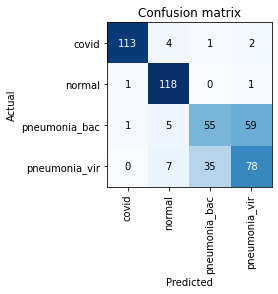

In [ ]:
#Plot the confusion matrix
interp.plot_confusion_matrix()

# Example

In [ ]:
#Imports an X Ray image
import cv2
from fastai.vision import *
img_cv2 = cv2.imread('/content/drive/MyDrive/covid/prueba/test/pneumonia_vir/vir(6).jpeg')

In [ ]:
#Convert PIL style image array to torch style image tensor.
img_fastai = Image(pil2tensor(img_cv2, dtype=np.float32).div_(255))

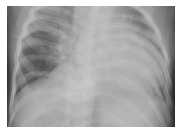

In [ ]:
#Show the imported image
img_fastai.show()

In [ ]:
#The imported image is processed by the trained DarkNet
r=learn.predict(img_fastai)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [ ]:
#Class labels
labels={'Random':0,
        'COVID':1,
        'Normal':2,
        'Bacterial Pneumonia':3,
        'Viral Pneumonia':4
        }
names= dict((v,k) for k,v in labels.items())

In [ ]:
#Obtains the belonging percentage of the image to each class
scores=r[2]
scores=scores.numpy()

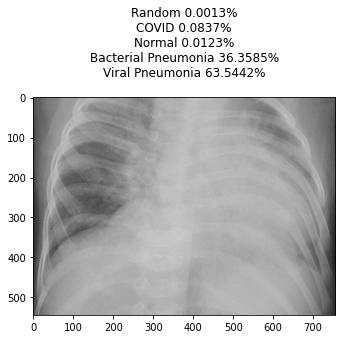

In [ ]:
#Shows the belongins percentages of the image to each class
plt.title(names[0] +" "+ str(round(scores[0]*100,4))+"%"+"\n"+names[1] +" "+ 
          str(round(scores[1]*100,4))+"%"+"\n"+names[2] +" "+ 
          str(round(scores[2]*100,4))+"%"+"\n"+names[3] +" "+ 
          str(round(scores[3]*100,4))+"%"+"\n"+names[4] +" "+ 
          str(round(scores[4]*100,4))+"%"+"\n")
#Plots the image
plt.imshow(img_cv2)